In [139]:
import keras.models
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Lambda, BatchNormalization
from keras.utils.version_utils import callbacks
from matplotlib import pyplot as plt
from keras.callbacks import EarlyStopping
from keras import Sequential

In [140]:
df = pd.read_csv('preprocessed_v.csv')

In [141]:
df = df.drop(columns='Unnamed: 0')
df = df.replace(np.nan, 'null', regex=True)

In [142]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,truck,black
1,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,other,4wd,pickup,black
2,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,other,4wd,pickup,silver
3,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,automatic,4wd,truck,grey
4,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,other,4wd,pickup,red
...,...,...,...,...,...,...,...,...,...,...,...,...
122431,25590,2017.0,null,Genesis G80 3.8 Sedan 4D,good,6 cylinders,gas,37608.0,automatic,rwd,sedan,white
122432,13990,2016.0,null,Scion iM Hatchback 4D,good,null,other,75626.0,other,fwd,hatchback,white
122433,22990,2020.0,hyundai,sonata se sedan 4d,good,null,gas,3066.0,other,fwd,sedan,blue
122434,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,automatic,rwd,sedan,white


In [143]:
encoded_data = df[df.columns]
encoded_data = encoded_data.dropna()
encoded_data.shape

(122436, 12)

In [144]:


scalers = [StandardScaler(), StandardScaler()]

encoded_data['year'] = scalers[0].fit_transform(encoded_data['year'].values.reshape(-1, 1))
encoded_data['odometer'] = scalers[1].fit_transform(encoded_data['odometer'].values.reshape(-1, 1))


encoded_data

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,15000,0.141352,ford,f-150 xlt,excellent,6 cylinders,gas,0.272400,automatic,rwd,truck,black
1,27990,-0.024487,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,-0.279794,other,4wd,pickup,black
2,34590,0.638869,chevrolet,silverado 1500 double,good,6 cylinders,gas,-0.644768,other,4wd,pickup,silver
3,35000,1.136385,toyota,tacoma,excellent,6 cylinders,gas,-0.519057,automatic,4wd,truck,grey
4,29990,0.638869,chevrolet,colorado extended cab,good,6 cylinders,gas,-0.758337,other,4wd,pickup,red
...,...,...,...,...,...,...,...,...,...,...,...,...
122431,25590,0.804708,null,Genesis G80 3.8 Sedan 4D,good,6 cylinders,gas,-0.569263,automatic,rwd,sedan,white
122432,13990,0.638869,null,Scion iM Hatchback 4D,good,null,other,-0.215267,other,fwd,hatchback,white
122433,22990,1.302224,hyundai,sonata se sedan 4d,good,null,gas,-0.890892,other,fwd,sedan,blue
122434,33590,0.970546,lexus,gs 350 sedan 4d,good,6 cylinders,gas,-0.632524,automatic,rwd,sedan,white


In [145]:
cols = ['manufacturer', 'fuel','condition','drive','cylinders','transmission','type','paint_color','model']

In [146]:

encoded_data =pd.get_dummies(encoded_data, dummy_na=True, columns = ['manufacturer', 'fuel','condition','drive','cylinders','transmission','type','paint_color'])
encoders = []

encoded_data['model'] = LabelEncoder().fit_transform(encoded_data['model'])

In [147]:
# from sklearn.preprocessing import LabelEncoder
#
# for column in cols:
#     encoded_data[column] = LabelEncoder().fit_transform(encoded_data[column])
# encoded_data
encoded_data

,price,year,model,odometer,manufacturer_acura,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,paint_color_nan
0,15000,0.141352,226,0.272400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,27990,-0.024487,469,-0.279794,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34590,0.638869,476,-0.644768,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,35000,1.136385,521,-0.519057,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,29990,0.638869,122,-0.758337,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122431,25590,0.804708,44,-0.569263,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
122432,13990,0.638869,48,-0.215267,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
122433,22990,1.302224,497,-0.890892,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122434,33590,0.970546,309,-0.632524,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [148]:
df_for_1_model = encoded_data.copy()

In [149]:
X_train = encoded_data.drop(columns=['price'], axis=1)
y_train = encoded_data['price']
X_train, X_test, y_train, y_test = split(X_train, y_train, train_size=0.8, random_state=18)
y_test.shape

(24488,)

In [12]:


size = 97
def residual_block(x):
  y = Dense(size, activation='relu')(x)
  for i in range (0,3):
      y = Dense(size, activation='relu')(y)
  y = tf.keras.layers.Add()([x, y])
  return y

def self_attention(x):
  """A self-attention layer."""
  q = Dense(size, activation='tanh')(x)
  k = Dense(size, activation='tanh')(x)
  v = Dense(size, activation='tanh')(x)
  a = Lambda(lambda x: tf.matmul(x[0], x[1], transpose_b=True))(
      [q, k])
  a = tf.nn.softmax(a, axis=-1)
  y = Lambda(lambda x: tf.matmul(x[0], x[1]))([a, v])
  return y
inputs = tf.keras.layers.Input(shape=(size,))

# Residual blocks

x = residual_block(inputs)
x = BatchNormalization()(x)
x = residual_block(x)
x = BatchNormalization()(x)
x = self_attention(x)
x = BatchNormalization()(x)
x = residual_block(x)
x = BatchNormalization()(x)
x = residual_block(x)
x = BatchNormalization()(x)
x = self_attention(x)
x = BatchNormalization()(x)

# Dropout
x = Dropout(0.1)(x)

# Output layer
outputs = Dense(1)(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='rmsprop', loss='mse')

In [12]:


model = Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(70, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(50, activation='relu'))

model.add(Dense(1)) # O/P

model.compile(optimizer='rmsprop', loss='mse')


In [13]:

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')


In [15]:

checkpoint = callbacks.ModelCheckpoint(
        './tmp/checkpoint', save_format='tf', monitor='mse',verbose=0, save_best_only=True, save_weights_only=True)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint,early_stopping],
                    verbose=1,batch_size=256)


Epoch 1/30
383/383 [==============================] - 3s 5ms/step - loss: 465537984.0000 - val_loss: 451699808.0000
Epoch 2/30
383/383 [==============================] - 2s 4ms/step - loss: 431769568.0000 - val_loss: 405700928.0000
Epoch 3/30
383/383 [==============================] - 2s 4ms/step - loss: 345384672.0000 - val_loss: 334569024.0000
Epoch 4/30
383/383 [==============================] - 2s 4ms/step - loss: 209186272.0000 - val_loss: 120796248.0000
Epoch 5/30
383/383 [==============================] - 2s 4ms/step - loss: 77467200.0000 - val_loss: 60255252.0000
Epoch 6/30
383/383 [==============================] - 2s 4ms/step - loss: 31440920.0000 - val_loss: 55787136.0000
Epoch 7/30
383/383 [==============================] - 2s 4ms/step - loss: 29321066.0000 - val_loss: 31464752.0000
Epoch 8/30
383/383 [==============================] - 1s 4ms/step - loss: 28631278.0000 - val_loss: 28815096.0000
Epoch 9/30
383/383 [==============================] - 1s 4ms/step - loss: 272198

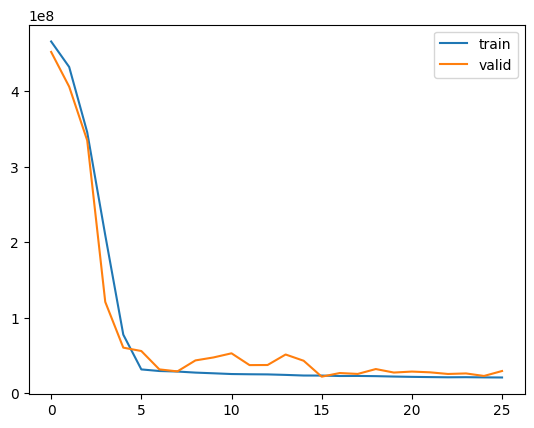

In [17]:
plt.figure(1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

# model.save('resnet_l2.h5')

In [150]:
import keras
model = keras.models.load_model('resnet_l2_onehot.h5')

In [15]:
# model.save('resnet_l2_onehot.h5')

In [151]:
y_pred = model.predict(X_test)

766/766 [==============================] - 2s 2ms/step


In [152]:
y_pred_train = model.predict(X_train)

3061/3061 [==============================] - 5s 2ms/step


In [18]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_pred_train)
print("R Squared value of train data: ",r2_train)

R Squared value of train data:  0.85381369593269


In [19]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred)
print("R Squared value of test data: ",r2_test)

R Squared value of test data:  0.8487772743820527


In [153]:
X_train.insert(0, 'pre_result', y_pred_train)
X_test.insert(0, 'pre_result', y_pred)

In [23]:
X_train.to_csv('train_with_pre_L2.csv')
X_test.to_csv('test_with_pre_L2.csv')

In [24]:
X_train = pd.read_csv('train_with_pre_L2.csv')
X_train = X_train.drop(columns='Unnamed: 0')
X_test = pd.read_csv('test_with_pre_L2.csv')
X_test = X_test.drop(columns='Unnamed: 0')

In [154]:
from keras.metrics import metrics

xgb_params = {
    'n_estimators':150,
    'learning_rate':0.1,
    'gamma':0,
    'subsample':0.8,
    'colsample_bytree':0.9,
    'max_depth':8
}

lgbm_params ={
    'feature_fraction':0.8,
    'bagging_fraction':0.8,
    'bagging_freq':2,
    'num_leaves':32
}
def MAPE_metric(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def MAE_metric(y_true, y_pred):
    return metrics.mean_absolute_error(y_true, y_pred)
def Accuracy_metric(y_true, y_pred):
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n
    alpha = pd.DataFrame(abs(y_true - y_pred)/y_true)
    Accuracy = (alpha[alpha <= 0.05].count() /alpha.count())*0.8+0.2*(1-mape)
    return np.float(Accuracy)

In [15]:
import xgboost as xgb


def train_xgb(x_train_f, y_train_f,x_test_f,y_test_f, params):
    mdl = xgb.XGBRegressor(**params)
    mdl.fit(x_train_f, y_train_f)
    y_pred_test = mdl.predict(x_test_f)
    y_pred_train_f = mdl.predict(x_train_f)
    x_train_f['pre_result'] = y_pred_train_f
    x_test_f['pre_result'] = y_pred_test
    return MAPE_metric(y_test_f, y_pred_test), Accuracy_metric(y_test_f, y_pred_test)

In [16]:
from lightgbm import LGBMRegressor


def train_lgbm(x_train_f, y_train_f,x_test_f,y_test_f, params):
    mdl = LGBMRegressor(**params)
    mdl.fit(x_train_f, y_train_f)
    y_pred_test = mdl.predict(x_test_f)
    y_pred_train = mdl.predict(x_train_f)

    x_train_f['pre_result'] = y_pred_train
    x_test_f['pre_result'] = y_pred_test
    return MAPE_metric(y_test_f, y_pred_test), Accuracy_metric(y_test_f, y_pred_test)

In [164]:
from sklearn.ensemble import RandomForestRegressor
def train_rf(x_train_f, y_train_f,x_test_f,y_test_f, params):
    mdl = RandomForestRegressor(n_estimators = 50,verbose=3,n_jobs=-1,max_depth=50)
    mdl.fit(x_train_f, y_train_f)
    y_pred_test = mdl.predict(x_test_f)
    y_pred_train = mdl.predict(x_train_f)

    x_train_f['pre_result'] = y_pred_train
    x_test_f['pre_result'] = y_pred_test
    return MAPE_metric(y_test_f, y_pred_test), Accuracy_metric(y_test_f, y_pred_test)

In [157]:
def vizualize(x,y):
    plt.plot(x,y)
    plt.show()

In [165]:

# global index
# index = 1
def use_XGB_rf_framework(x_train_f,y_train_f,x_test_f,y_test_f):
    min_loss = np.inf
    acc_res = []
    max_acc = 0
    loss = 1000000000000
    # while loss < min_loss:
    for index in range(1,30):
        print("loss= "+str(loss))
        print("min_loss= "+str(min_loss))
        min_loss = loss
        if index%2==1:
            loss, acc = train_xgb(x_train_f, y_train_f,x_test_f,y_test_f, xgb_params)
        else:
            loss,acc = train_rf(x_train_f, y_train_f,x_test_f, y_test_f, [])
        acc_res.append(acc)
    enum = range(1, len(acc_res)+1)
    if acc > max_acc:
        max_acc = acc
    acc_res

    return enum,acc_res,max_acc

In [166]:

# global index
# index = 1
def use_XGB_LGBM_framework(x_train_f,y_train_f,x_test_f,y_test_f):
    min_loss = np.inf
    acc_res = []
    max_acc = 0
    loss = 1000000000000
    # while loss < min_loss:
    for index in range(1,100):
        print("loss= "+str(loss))
        print("min_loss= "+str(min_loss))
        min_loss = loss
        if index%2==1:
            loss, acc = train_xgb(x_train_f, y_train_f,x_test_f,y_test_f, xgb_params)
        else:
            loss,acc = train_lgbm(x_train_f, y_train_f,x_test_f, y_test_f, lgbm_params)
        acc_res.append(acc)
    enum = range(1, len(acc_res)+1)
    if acc > max_acc:
        max_acc = acc
    acc_res

    return enum,acc_res,max_acc

In [ ]:
enum1,acc_res1,max_acc1 = use_XGB_LGBM_framework(X_train,y_train,X_test,y_test)
vizualize(enum1,acc_res1)

In [31]:
global single_results
single_results = pd.DataFrame(columns=['r2'])

global complex_results
complex_results = pd.DataFrame(columns=['r2'])

In [50]:
def train_model(concrete_model, x_train, y_train_f, x_test, y_test_f):
    concrete_model.fit(x_train, y_train_f)
    pred_train = concrete_model.predict(x_train)
    pred_test = concrete_model.predict(x_test)
    global single_results
    single_results = single_results.append(
        pd.DataFrame({'r2': [Accuracy_metric(y_test_f, pred_test)]}, index=[str(type(concrete_model).__name__)]))
    return pred_train, pred_test

def train_model_add_preds(concrete_model, x_train, y_train_f, x_test, y_test_f):
    pred_train, pred_test = train_model(concrete_model, x_train, y_train_f, x_test, y_test_f)
    x_train.insert(0, 'pre_result', pred_train)
    x_test.insert(0, 'pre_result', pred_test)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
linear = LinearRegression()
rf = RandomForestRegressor()
xgb_1 = xgb.XGBRegressor(**xgb_params)
lgbm_1 = lgb.LGBMRegressor(**lgbm_params)

In [34]:
X_train_single = df_for_1_model.drop(columns=['price'], axis=1)
y_train_single = df_for_1_model['price']
X_train_single, X_test_single, y_train_single, y_test_single = split(X_train_single, y_train_single, train_size=0.8, random_state=18)


y_test_single.shape

(24488,)

In [35]:
models = [linear,rf,xgb_1,lgbm_1]
for m in models:
    train_model(m, X_train_single, y_train_single, X_test_single, y_test_single)

C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

In [36]:
single_results = single_results.append(pd.DataFrame({'r2': [r2_score(y_train, y_pred_train)]}, index=['ResNet']))

In [37]:
single_results

,r2
LinearRegression,0.199300
RandomForestRegressor,0.588916
XGBRegressor,0.411218
LGBMRegressor,0.337794
ResNet,0.832121


In [38]:
import joblib
joblib.dump(linear, "linearl2.joblib")
joblib.dump(rf, "rfl2.joblib")
joblib.dump(xgb_1, "xgb_1l2.joblib")
joblib.dump(lgbm_1, "lgbm_1l2.joblib")

['lgbm_1l2.joblib']

In [39]:
global complex_results
complex_results = pd.DataFrame(columns=['r2'])
accuracies = []
X_train_single = df_for_1_model.drop(columns=['price'], axis=1)
y_train_single = df_for_1_model['price']
X_train_single, X_test_single, y_train_single, y_test_single = split(X_train_single, y_train_single, train_size=0.8,
                                                                     random_state=18)
for m in models:
    train_model_add_preds(m, X_train_single, y_train_single, X_test_single, y_test_single)

    enum1, acc_res1, max_acc1 = use_XGB_LGBM_framework(X_train_single, y_train_single, X_test_single, y_test_single)
    accuracies.append(acc_res1)
    complex_results = complex_results.append(
        pd.DataFrame({'r2': [max_acc1]}, index=[str(type(m).__name__)]))
    X_train_single = df_for_1_model.drop(columns=['price'], axis=1)
    y_train_single = df_for_1_model['price']
    X_train_single, X_test_single, y_train_single, y_test_single = split(X_train_single, y_train_single, train_size=0.8,
                                                                         random_state=18)

C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


loss= 1000000000000
min_loss= inf
loss= 20.989304626873455
min_loss= 1000000000000
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001903 seconds.
You can set `force_row_wise=true` t

C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


loss= 1000000000000
min_loss= inf
loss= 16.292432219842592
min_loss= 1000000000000
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002172 seconds.
You can set `force_row_wise=true` t

In [43]:
complex_results = complex_results.append(
        pd.DataFrame({'r2': [max_acc1]}, index=['ResNet']))

In [46]:
complex_results

,r2
LinearRegression,0.608270
RandomForestRegressor,0.623291
XGBRegressor,0.608947
LGBMRegressor,0.607729
ResNet,0.607729
ResNet,0.607729


In [44]:
e = range(1,50)

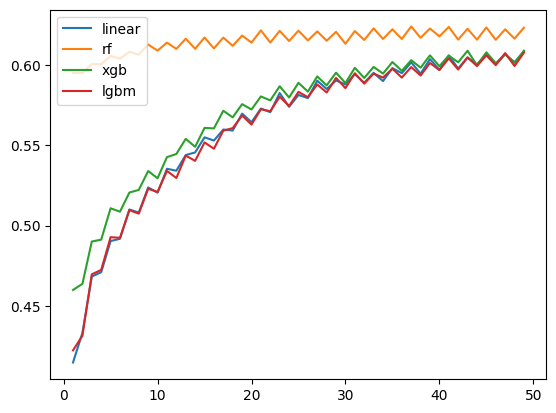

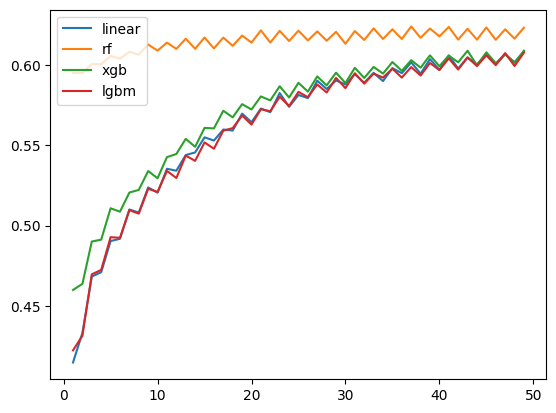

In [45]:
for m in accuracies:
    plt.plot(e,m)

plt.legend(['linear', 'rf','xgb','lgbm'], loc='upper left')
plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder

for column in cols:
    encoded_data[column] = LabelEncoder().fit_transform(encoded_data[column])
encoded_data

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,15000,0.141352,9,226,0,5,2,0.272400,0,2,10,0
1,27990,-0.024487,10,469,2,6,2,-0.279794,2,0,8,0
2,34590,0.638869,5,476,2,5,2,-0.644768,2,0,8,9
3,35000,1.136385,31,521,0,5,2,-0.519057,0,0,10,5
4,29990,0.638869,5,122,2,5,2,-0.758337,2,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...
122431,25590,0.804708,25,44,2,5,2,-0.569263,0,2,9,10
122432,13990,0.638869,25,48,2,7,4,-0.215267,2,1,4,10
122433,22990,1.302224,12,497,2,7,2,-0.890892,2,1,9,1
122434,33590,0.970546,17,309,2,5,2,-0.632524,0,2,9,10


In [33]:
df_for_1_model = encoded_data.copy()
X_train = encoded_data.drop(columns=['price'], axis=1)
y_train = encoded_data['price']
X_train, X_test, y_train, y_test = split(X_train, y_train, train_size=0.8, random_state=18)
y_test.shape

(24488,)

In [23]:
model = keras.models.load_model('resnet_l2_onehot.h5')

In [41]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
X_train.insert(0, 'pre_result', y_pred_train)
X_test.insert(0, 'pre_result', y_pred)

3061/3061 [==============================] - 3s 816us/step


loss= 1000000000000
min_loss= inf


C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


loss= 20.80696021014552
min_loss= 1000000000000
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memor

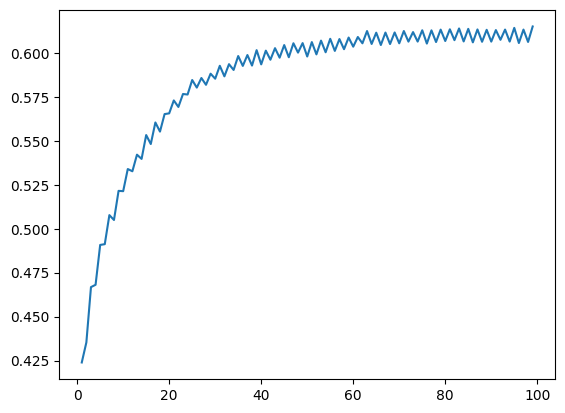

In [42]:
enum2,acc_res2,max_acc2 = use_XGB_LGBM_framework(X_train,y_train, X_test,y_test)
vizualize(enum2,acc_res2)

In [43]:
e = range(1,100)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
linear = LinearRegression()
rf = RandomForestRegressor()
xgb_1 = xgb.XGBRegressor(**xgb_params)
lgbm_1 = lgb.LGBMRegressor(**lgbm_params)

In [48]:
models = [linear,rf,xgb_1,lgbm_1]
# for m in models:
    # train_model(m, X_train_single, y_train_single, X_test_single, y_test_single)

In [52]:
global complex_results2
complex_results2 = pd.DataFrame(columns=['r2'])
global single_results
single_results = pd.DataFrame(columns=['r2'])
accuracies = []
X_train_single = df_for_1_model.drop(columns=['price'], axis=1)
y_train_single = df_for_1_model['price']
X_train_single, X_test_single, y_train_single, y_test_single = split(X_train_single, y_train_single, train_size=0.8,
                                                                     random_state=18)
for m in models:
    train_model_add_preds(m, X_train_single, y_train_single, X_test_single, y_test_single)

    enum1, acc_res1, max_acc1 = use_XGB_LGBM_framework(X_train_single, y_train_single, X_test_single, y_test_single)
    accuracies.append(acc_res1)
    complex_results2 = complex_results2.append(
        pd.DataFrame({'r2': [max_acc1]}, index=[str(type(m).__name__)]))
    X_train_single = df_for_1_model.drop(columns=['price'], axis=1)
    y_train_single = df_for_1_model['price']
    X_train_single, X_test_single, y_train_single, y_test_single = split(X_train_single, y_train_single, train_size=0.8,
                                                                         random_state=18)

C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


loss= 1000000000000
min_loss= inf
loss= 20.989304626873455
min_loss= 1000000000000
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002213 seconds.
You can set `force_row_wise=true` t

C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


loss= 1000000000000
min_loss= inf
loss= 16.312019025584597
min_loss= 1000000000000
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002161 seconds.
You can set `force_row_wise=true` t

In [53]:
complex_results2 = complex_results2.append(
    pd.DataFrame({'r2': [max_acc1]}, index=['ResNet']))
complex_results2

,r2
LinearRegression,0.616092
RandomForestRegressor,0.622516
XGBRegressor,0.617771
LGBMRegressor,0.617799
ResNet,0.617799


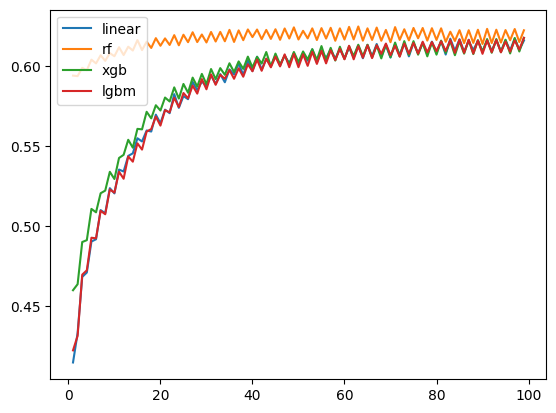

In [54]:
for m in accuracies:
    plt.plot(e,m)

plt.legend(['linear', 'rf','xgb','lgbm'], loc='upper left')
plt.show()

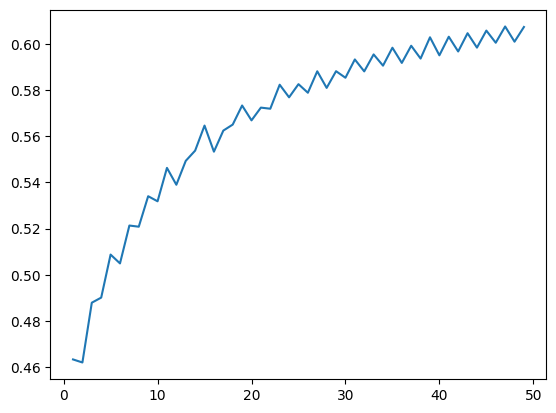

In [28]:
vizualize(enum2,acc_res2)

In [39]:
history2 = model.fit(X_train, y_train, epochs=30,
                     validation_data=(X_test, y_test),
                     callbacks=[early_stopping],
                     verbose=1, batch_size=256)


Epoch 1/30
383/383 [==============================] - 3s 4ms/step - loss: 461511168.0000 - val_loss: 440428128.0000
Epoch 2/30
383/383 [==============================] - 1s 4ms/step - loss: 409126240.0000 - val_loss: 361914496.0000
Epoch 3/30
383/383 [==============================] - 1s 4ms/step - loss: 286694720.0000 - val_loss: 217138864.0000
Epoch 4/30
383/383 [==============================] - 1s 4ms/step - loss: 120390392.0000 - val_loss: 73952040.0000
Epoch 5/30
383/383 [==============================] - 2s 5ms/step - loss: 14658882.0000 - val_loss: 11022808.0000
Epoch 6/30
383/383 [==============================] - 2s 5ms/step - loss: 5860676.0000 - val_loss: 13206156.0000
Epoch 7/30
383/383 [==============================] - 2s 5ms/step - loss: 5309396.0000 - val_loss: 21605258.0000
Epoch 8/30
383/383 [==============================] - 2s 5ms/step - loss: 5293989.5000 - val_loss: 25124208.0000
Epoch 9/30
383/383 [==============================] - 2s 6ms/step - loss: 5504391.50

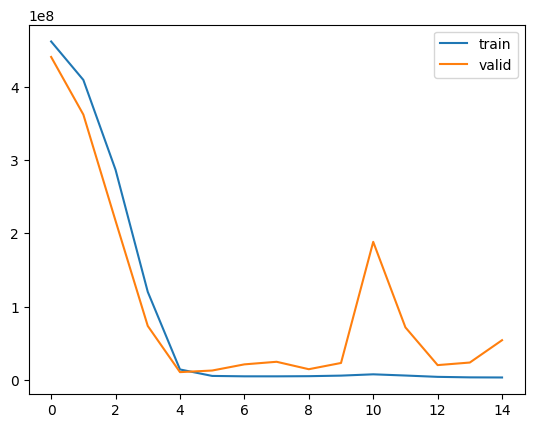

In [40]:
plt.figure(1)
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [41]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_pred_train)
print("R Squared value of train data: ", r2_train)


r2_test = r2_score(y_test, y_pred)
print("R Squared value of test data: ", r2_test)

3061/3061 [==============================] - 2s 721us/step
R Squared value of train data:  0.6822461688620021
R Squared value of test data:  0.6216549977722644


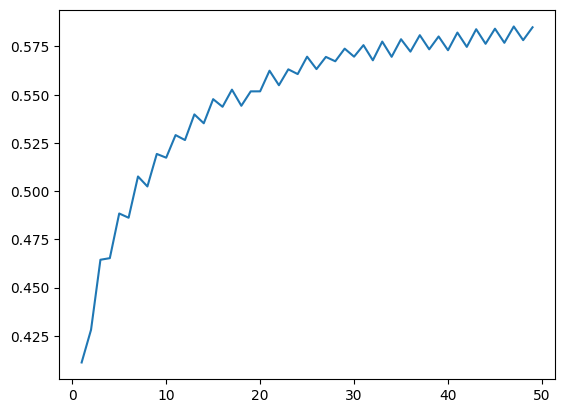

In [20]:
vizualize(enum2,acc_res2)

In [19]:
X_train

,year,model,odometer,manufacturer_acura,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,...,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,paint_color_nan,pre_result
21500,-1.185358,56,0.235155,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5209.939453
9777,1.468063,390,-0.878499,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,35856.546875
32800,0.970546,498,-0.763114,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,18898.162109
8101,-1.848714,459,0.398829,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,10012.111328
2375,0.638869,389,-0.249030,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11067.344727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,0.307191,472,-0.189717,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,30787.693359
35653,0.804708,224,-0.563015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,268.136505
91256,-0.024487,258,-0.226124,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,8871.826172
94483,-0.024487,479,0.296526,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,19405.849609


In [23]:
history2 = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping],
                    verbose=1,batch_size=256)

Epoch 1/30
383/383 [==============================] - 4s 7ms/step - loss: 462849216.0000 - val_loss: 444959072.0000
Epoch 2/30
383/383 [==============================] - 2s 5ms/step - loss: 414352736.0000 - val_loss: 366619104.0000
Epoch 3/30
383/383 [==============================] - 2s 5ms/step - loss: 297150976.0000 - val_loss: 226394464.0000
Epoch 4/30
383/383 [==============================] - 2s 5ms/step - loss: 132077624.0000 - val_loss: 75218784.0000
Epoch 5/30
383/383 [==============================] - 2s 6ms/step - loss: 17530004.0000 - val_loss: 11968657.0000
Epoch 6/30
383/383 [==============================] - 2s 6ms/step - loss: 5456635.0000 - val_loss: 10712224.0000
Epoch 7/30
383/383 [==============================] - 2s 6ms/step - loss: 4969350.0000 - val_loss: 12181655.0000
Epoch 8/30
383/383 [==============================] - 2s 6ms/step - loss: 4733601.0000 - val_loss: 13996838.0000
Epoch 9/30
383/383 [==============================] - 2s 6ms/step - loss: 5128211.00

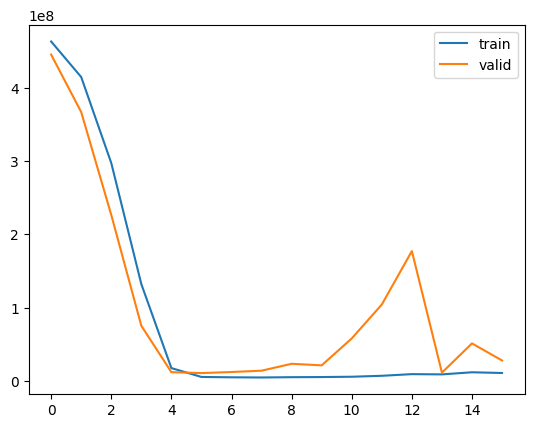

In [24]:
plt.figure(1)
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [25]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_pred_train)
print("R Squared value of train data: ", r2_train)


r2_test = r2_score(y_test, y_pred)
print("R Squared value of test data: ", r2_test)

3061/3061 [==============================] - 3s 972us/step
R Squared value of train data:  0.8043607293516818
R Squared value of test data:  0.8065805200467097


loss= 1000000000000
min_loss= inf


C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


loss= 14.26764282284564
min_loss= 1000000000000
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50building tree 18 of 50

building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 o

[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    8.6s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.2s finished
C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and g

loss= 14.195749447773432
min_loss= 14.26764282284564
loss= 14.261752267064917
min_loss= 14.195749447773432
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    8.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.3s finished
C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and g

loss= 14.197497508916939
min_loss= 14.261752267064917
loss= 14.266243071137009
min_loss= 14.197497508916939
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    8.5s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.2s finished
C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and g

loss= 14.199250179210168
min_loss= 14.266243071137009
loss= 14.26570165463997
min_loss= 14.199250179210168
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    7.8s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.1s finished
C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and g

loss= 14.200080026736398
min_loss= 14.26570165463997
loss= 14.267708831253422
min_loss= 14.200080026736398
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    8.8s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.2s finished
C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and g

loss= 14.200323363261525
min_loss= 14.267708831253422
loss= 14.269815836192794
min_loss= 14.200323363261525
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    9.8s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.2s finished
C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and g

loss= 14.204657743539508
min_loss= 14.269815836192794
loss= 14.275236511563389
min_loss= 14.204657743539508
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 17 of 50building tree 18 of 50

building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    7.8s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.2s finished
C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and g

loss= 14.208964347177039
min_loss= 14.275236511563389
loss= 14.280592358166519
min_loss= 14.208964347177039
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    8.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.2s finished
C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and g

loss= 14.213617478215776
min_loss= 14.280592358166519
loss= 14.28619185918383
min_loss= 14.213617478215776
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50building tree 40 of 50

building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    8.4s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.2s finished
C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and g

loss= 14.22062554946349
min_loss= 14.28619185918383
loss= 14.291584302166308
min_loss= 14.22062554946349
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50building tree 50 of 50



[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    8.6s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.2s finished
C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and g

loss= 14.226152757430317
min_loss= 14.291584302166308
loss= 14.296912465619641
min_loss= 14.226152757430317
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    7.9s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.2s finished
C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and g

loss= 14.231645298223983
min_loss= 14.296912465619641
loss= 14.303799690086588
min_loss= 14.231645298223983
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50

building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    8.4s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.2s finished
C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and g

loss= 14.240419678582967
min_loss= 14.303799690086588
loss= 14.309316859676443
min_loss= 14.240419678582967
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50building tree 50 of 50



[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    7.5s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.2s finished
C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and g

loss= 14.243115581861973
min_loss= 14.309316859676443
loss= 14.313657348239783
min_loss= 14.243115581861973
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50building tree 47 of 50

building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    7.7s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  36 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.2s finished
C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and g

loss= 14.250154982642501
min_loss= 14.313657348239783


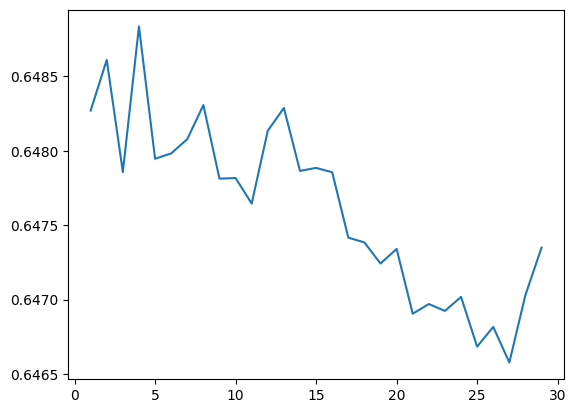

In [168]:
enum_rf, acc_rf, max_acc_rf = use_XGB_rf_framework(X_train,y_train, X_test,y_test)
vizualize(enum_rf,acc_rf)